In [26]:
from Levenshtein import distance as lev
import numpy as np
"""
input: 2 strings
output: the length of the longest common sequence (integer)

it is based on 2 loops that check all the combination between every two elements of the strigs nd finds the highest 
"""

def lcs(x , y): 
    m = len(x) 
    n = len(y) 
    
    #create a table with dimensions corresponsing to the length of the strings
    L = [[None]*(n+1) for i in range(m+1)] 
    
    #traverse throught all the combinations 
    for i in range(m+1): 
        for j in range(n+1): 
            if i == 0 or j == 0 : 
                L[i][j] = 0
            #if elements are the same add 1 to lcs and move diagonally 
            elif x[i-1] == y[j-1]:  
                L[i][j] = L[i-1][j-1]+1
            else: 
            #assign the higest value between the one on the left and up. 
                L[i][j] = max(L[i-1][j] , L[i][j-1]) 
    return L

def find_all_lcs(L, x, y, m, n):
    """
    input 
    L: 2d list, 
    x, y: string,
    m, n: integer (length of x, y)
    
    output: 
    list of all possible longest common subsequences
    """
    #if one of them is empty
    if m == 0 or n == 0:
        return [''] 
    #if the elements are matching add it to the result 
    elif x[m-1] == y[n-1]:
        result = [Z + x[m-1] for Z in find_all_lcs(L, x, y, m-1, n-1)]
        return result
    else:
        result = []
        #look at the elements up and left in the table 
        if L[m][n-1] >= L[m-1][n]:
            result += find_all_lcs(L, x, y, m, n-1)
        if L[m-1][n] >= L[m][n-1]:
            result += find_all_lcs(L, x, y, m-1, n)
        return result
    


def longest_common_subsequence(x, y):
    """
    input: 
    x, y: string
    
    output: 
    tuple containing list of all the possible combinations of lcs, the length of lcs
    
    produces the required format of the output
    """
    #set guard clause to prevent the unessesary run of the functnios. 
    if len(x) == 0 or len(y) == 0:
        return (None, 0) 
    
    L = lcs(x , y)
    result = find_all_lcs(L, x, y, len(x), len(y))
    length = len(result[0])
    
    #set the case for 0 common subsequencess
    if '' in result:
        result = None 
    return result, length

#the code is based on the code from CS110 class


In [27]:


x1, y1 = 'ABCBDAB', 'BDCABA'
x2, y2 = 'abc', ''
x3, y3 = 'abc', 'a'
x4, y4 = 'abc', 'ac'
x5, y5 = '', ''
x6, y6 = 'abc', 'efg'
x7, y7 = 'aaa', 'aaa'

"""
I changed the order of the common subsequences in the first assertion statement 
according to the appearance of letters in the second string  
"""
assert longest_common_subsequence(x1, y1) == (['BDAB', 'BCAB', 'BCBA'], 4)
assert longest_common_subsequence(x2, y2) == (None, 0)
assert longest_common_subsequence(x3, y3) == (['a'], 1)
assert longest_common_subsequence(x4, y4) == (['ac'], 2)
assert longest_common_subsequence(x5, y5) == (None, 0)
assert longest_common_subsequence(x6, y6) == (None, 0)
assert longest_common_subsequence(x7, y7) == (['aaa'], 3)



In [28]:

set_strings = [('a', 'ACAGCAAGCCATTCCTTAGAGAACGAAATTACGGCGACCGTCAGGGGCATAGCTCCGAGGCATACACTGACGTGTTGGGA'),
('b', 'CAGCAGCACAGTCCTGAGATAGCGAAATGAACCGCGACCGTCAGGGGCCTTCGGCCTCCCGAGGTATTACGGCTGACAGTGGTTGGGA'),
('c', 'GCACCAAGCCTTCACTAGAGGAACCCAGAACTAAGGGTCAGACCGTGTCGGGCCATGCATGCCGAGGTATTACGGACTAGTACGA'),
('d', 'CAGCAGCACAGTCCTGAGATGACGAAATTAACCGGCGACCGTCAGGGGCCATAGCCTCCGGGGCATACGACTGACGTGGTGGGA'),
('e', 'GCAGCAAGCCTTCACTTAGAGAACCGAAACTAGGGCAGACGGTCGGGCATGCATGCCGAGGATATACGGACTAGTACGGGA'),
('f', 'GCTAGCACAAGCCTTCACTTAGATGAACCTAAACTAGGCAGACGGGTCGGCAAGCATAGTCCGAGGATATACAGCGACTAGTACGGG'),
('g', 'CAGCAGACAGCTCCTTGTGATGAACGAAATCAACCGGCGACCATGCAGGCGGCCATAGCCTCCGGTGGCATCACGACTGAGCCGTGGTGGA')]


def combinations(set_strings):
    """
    input: 
    set_strings: list of tuples with 2 strings
    
    output:
    string containing: 
    max_value, min_value integers,
    min_key[0],min_key[1] max_key[0], max_key[1] strings 
    """
        
    used = []
    result = {}
    for i in set_strings:
        #do not compare strings twice
        used.append(i)
        for j in set_strings:
            #do not compare 2 identical strings 
            if i == j:
                continue
            if j not in used:
                length = len(longest_common_subsequence(i[1], j[1])[0])
                result[(i[0],j[0])] = length
    max_value = max(result.values())
    max_key = max(result, key = result.get)
    min_value = min(result.values())
    min_key = min(result, key = result.get)
    output = "The maximum number of combinations of lcs is {} between {} and {}; the minimum number of combinations of lcs is {} between {} and {}".format(max_value,max_key[0],max_key[1],min_value,min_key[0], min_key[1])
    return output





In [ ]:
combinations(set_strings)

In [29]:
def matrix(set_strings,percentages = False):
    """
    input: 
    set_strings: list of tuples with 2 strings
    percentages bool automatically set to "False"
    
    output: 
    numpy matrix of the longest common sequences between every 2 strigs from the set_strings 
    
    program traverses throught every combination of strings and records the result for each row
    there are 2 options for the output: lcs and lcs in percentages. 
    """
    rows = []
    maxi = []
    
    for i in set_strings:
        #row is updated after each string was compared to all the other in the inner loop  
        row = []
        for j in set_strings:
            row.append(lcs(i[1],j[1])[-1][-1])
            #set the max value when the stright is compared to itself (100% match)
            if j[0]==i[0]:
                maxi.append(lcs(i[1],j[1])[-1][-1])
        # as the row is filled, add it to the main list
        rows.append(row)
    if percentages:
        for row in rows:
            for i in range(len(row)):
                #calculate the matrix using percentages
                row[i] = int(row[i]/maxi[i]*100)
    return np.matrix(rows)


len_lcs_matrix = matrix(set_strings,0)

print(len_lcs_matrix)

[[80 69 62 73 67 66 70]
 [69 88 62 76 62 61 72]
 [62 62 85 61 75 72 61]
 [73 76 61 84 62 63 79]
 [67 62 75 62 81 76 63]
 [66 61 72 63 76 87 65]
 [70 72 61 79 63 65 91]]


In [30]:

#matrix for the local strategy 
def matrix2(set_strings):
    """
    input: 
    set_strings: list of tuples with 2 strings
    
    output:
    numpy matrix of the minimum edit distance between every 2 strigs from the list 
    
    program traverses throught every combination of strings and records the result for each row
    """
    rows = []
    for i in set_strings:
        #row is updated after each string was compared to all the other in the inner loop  
        row = []
        for j in set_strings:
            if i == j:
                # to avoid bias set the comparison with itself to infinity 
                row.append(float('inf'))
            else:
                row.append(lev(i[1],j[1]))
        rows.append(row)
    return rows


matrix2(set_strings)

[[inf, 22, 30, 14, 20, 28, 24],
 [22, inf, 36, 14, 35, 40, 23],
 [30, 36, inf, 34, 14, 23, 42],
 [14, 14, 34, inf, 31, 37, 14],
 [20, 35, 14, 31, inf, 14, 39],
 [28, 40, 23, 37, 14, inf, 40],
 [24, 23, 42, 14, 39, 40, inf]]

In [31]:
import math
#local greedy strategy

def find_min(row):  
    """
    input 
    row: list with edit distace values(integers) 
    
    output
    minimum: list 
    indexes: list  
    
    function finds minimum values in the row and records its indexes 
    """
    #set starting values 
    minimum = [row[0], row[1]]
    indexes = [0,1]
    
    #skip the first 2 elements since they are starting values 
    for i in range(2,len(row)):
        for j in range(len(minimum)):
            #check if smaller 
            if row[i] < minimum[j]:
                e = minimum[j]
                ind = indexes[j]
                #remember to compare with the second element 
                minimum[j] = row[i]
                indexes[j] = i
                
                if (j+1) < len(minimum) and e < minimum[j+1]:
                    minimum[j+1] = e
                    indexes[j+1] = ind                
                break              
    return minimum, indexes
    
    

def matrix2(set_strings):
    """
    input: 
    set_strings: list of tuples with 2 strings
    
    output
    rows: numpy matrix of the minimum edit distance 
    
    function traverses throught every combination of strings and records the result for each row
    """
    rows = []
    for i in set_strings:
        row = []
        for j in set_strings:
            #if the element is compared with itself use infinity to avoid bias 
            if i == j:
                row.append(float('inf'))
            else:
                row.append(lev(i[1],j[1]))
        rows.append(row)
    return np.matrix(rows),rows

def clean_table(rows,indexes):
    """
    input
    rows: numpy matrix 
    indexes: list with indexes of the colums to be cleaned. 
    
    output 
    numpy matrix
    """
    for row in rows: 
        for i in indexes:
            row[i] = float('inf')
            
            
def find_children(rows,parent,greedy_tree): 
    """
    input
    rows: numpy matrix
    parent: list 
    greedy_tree: list
    
    output
    children: list
    indexes: list
    
    function find the children of a prenet based on its proximity 
    """
    row = rows[parent] 
    #recors the value of the child and its location
    children = find_min(row)[0]
    indexes = find_min(row)[1]
    
    #termination condition
    if children.count(float('inf')) == 2:
        return
    
    #remove spare nodes from the tree
    while children.count(float('inf')) > 0:
        children.remove(float('inf'))
        
    #add children to the tree
    greedy_tree.append(children) 
    clean_table(rows,indexes) 
    
    for i in indexes:
        find_children(rows,i,greedy_tree)
        
    return children,indexes

def build_tree(parent, set_strings):
    """
    input 
    parent: integer, parent node of the tree
    set_strings: list of tuples with 2 strings
    
    output
    greedy_tree: list representing a tree
    
    function builds the tree suing the defined above functinos 
    """
    rows = matrix2(set_strings)[1]    
    clean_table(rows, [parent])
    greedy_tree=[parent]
    find_children(rows,parent,greedy_tree) 
    return greedy_tree
    

def find_sum(greedy_tree):
    """
    input
    greedy_tree: list representing the tree
    
    output
    summ: integer 
    
    function calculated the sum of all the minmum edit distace of the tree
    """
    summ = 0 
    for i in greedy_tree[1:]:
        summ+= sum(i)
    node = greedy_tree[0]
    return summ

def greedy_approach(set_strings, print_output = False):
    """
    input
    set_strings: list of tuples with 2 strings
    print_output: bollean automatically set to Flase
    
    output
    result: list
    
    function finds the best tree from all the possible trees 
    """
    max_sum = float('inf')
    result = []
    for i in range(len(set_strings)):
        #build trees staring from each node as a parent node
        tree = build_tree(i, set_strings)
        if print_output:
            print(tree)
        #find the best tree based on the sum 
        if find_sum(tree) < max_sum:
            max_sum = find_sum(tree)
            result = [tree]
        elif find_sum(tree) == max_sum:
            result.append(tree)
    
    if len(result) > 1 and print_output:
        print('There is more than 1 solution')
    return result

greedy_approach(set_strings, True)


[0, [14, 20], [14, 14], [40, 42]]
[1, [14, 22], [14, 31], [40, 42]]
[2, [14, 23], [20, 31], [24, 22]]
[3, [14, 14], [20, 24], [14, 14]]
[4, [14, 14], [30, 34], [24, 22]]
[5, [14, 23], [20, 31], [24, 22]]
[6, [14, 23], [14, 31], [28, 30]]


[[3, [14, 14], [20, 24], [14, 14]]]

In [32]:
def matrix_gloabl(set_strings):
    """
    input
    set_strings: list of tuples with 2 strings 
    
    output
    rows: numpy matrix 
    
    function traverses throught every combination of strings and records the result for each row
    """
    rows = []
    set_strings = set_strings
    for i in set_strings:
        #row is updated after each string was compared to all the other in the inner loop  
        row = []
        for j in set_strings:
            row.append(lev(i[1],j[1]))
        rows.append(row)
    return rows


matrix_gloabl(set_strings)

[[0, 22, 30, 14, 20, 28, 24],
 [22, 0, 36, 14, 35, 40, 23],
 [30, 36, 0, 34, 14, 23, 42],
 [14, 14, 34, 0, 31, 37, 14],
 [20, 35, 14, 31, 0, 14, 39],
 [28, 40, 23, 37, 14, 0, 40],
 [24, 23, 42, 14, 39, 40, 0]]

In [33]:
#global stategy 

def find_cousins(rows):
    """
    input
    rows: numpy matrix 
    
    
    output
    cousins: list 
    
    function traverses the rows and finds the higest edit distance 
    """
    maxi = []
    for row in rows:
        maxi.append(max(row))
    highest = max(maxi)
    #index of the element based on the colum 
    index1 = maxi.index(highest)
    #index of the element based on the row 
    index2 = rows[index1].index(highest) 
    cousins = [index1,index2]
    return cousins
                
    
def find_bothers(rows):
    """
    input
    rows: numpy matrix 
    
    output
    result: list of lists with integers (indexes of brothers)
    
    function copies rows where the "cousins" are located and finds third closes element (first is the element itself, 
    second is a parent element and thirs would be a "brother" element)
    """
    i1, i2 = find_cousins(rows)
    r1 = sorted(rows[i1].copy())
    r2 = sorted(rows[i2].copy())
    bro1,bro2 = r1[2],r2[2]
    b1,b2 = [rows[i1].index(bro1),rows[i2].index(bro2)]
    result = [[i1,b1],[i2,b2]]
    return result

def find_parents(rows):
    """
    input
    rows: numpy matrix 
    
    output
    parents: list of an integer and a list 
    
    function finds the highest edit distance in the merged colums - uncles of the merged elements 
    """
    merged1 = rows[-1]
    merged2 = rows[-2]
    #clean the rows 
    #no need to clean colums since we consider only 2 merged columns
    for row in rows:
        for i in brothers:
            
            row[i[0]] = 0
            row[i[1]] = 0
    parents = [merged1.index(max(merged1)),merged2.index(max(merged2))]
    return parents 


def merge_colums(rows, indexes):
    """
    input
    rows: numpy matrix 
    
    output
    rows: numpy matrix 

    
    function merges 2 colums of the "brother" elements in 1 based on their averages 
    """
    merged1,merged2 = [],[]
    for row in rows:
        for i in indexes:
            
            #switch 0 to infinity to avoid confound
            if row[i[0]] == 0:
                row[i[0]] = float('inf')
            elif row[i[1]] == 0:
                row[i[1]] = float('inf')
                
            #sort merged values in the coresponsing columns
            if indexes.index(i) == 0:
                merged1.append((row[i[0]] + row[i[1]]) / 2) 
            else:
                merged2.append((row[i[0]] + row[i[1]]) / 2)
                
    #add new colums to the matrix
    rows.append(merged1)
    rows.append(merged2)
    return rows
    

def build_global_tree(rows,brothers,parents):
    """
    input
    rows: numpy matrix 
    brothers: list of lists with integers (indexes of brothers)
    parents: list of an integer and a list 
    
  
    output
    tree: list representing the structure of the tree
    
    function finds grandparent - element that was not yet used and builds tree using the output of other functions. 
    """
    n = len(rows[0])
    grandparent = [i for i in range(n)]
    #cross- assignment of parent because we were looking at the higest distace 
    for i in parents:
        grandparent.remove(i)
    for bro in brothers:
        for i in bro:
            grandparent.remove(i)
    tree = [grandparent[0],[parents[1],brothers[0]],[parents[0],brothers[1]]]
    return tree
    

 
 
rows = matrix_gloabl(set_strings)
brothers = find_bothers(rows)    
rows = merge_colums(rows, brothers)       
parents = find_parents(rows)
global_tree = build_global_tree(rows,brothers,parents)
print(global_tree)

[0, [3, [2, 5]], [4, [6, 1]]]


In [34]:
#pribabilities estimation

def probabilities(str1, str2, len1, len2):
    """
    input
    str1, str2: strings
    len1, len2: integers (lengths of str1 and str2 respectively)
     
    output
    result: list of floats
    
    function the number of changed characters using lcs as a basis and calucates the percentage  
    """
    l = lcs(str1 , str2)[-1][-1]
    #find the remaining of the string that does not include common characters
    rest1 = len1 - l
    rest2 = len2 - l
    insertion, deletion, mutation = 0,0,0
    # if the child is bigger there was no deletion
    if rest1 < rest2:
        insertion = rest2 - rest1
        mutation = rest1
    #if smaller - no insertion
    elif rest2 < rest1:
        deletion = rest1 - rest2
        mutation = rest2
    #in they are equal the characters mutated
    elif rest2 == rest1:
        mutation = rest1
    #since str2 is a child string
    result = mutation/len2, deletion/len2, insertion/len2
    return result 

def links(tree):
    """
    input
    tree: list of lists
    
    output
    links: list of lists. Each inner list contains 2 elements in the following form: [parent, child]
    
    function deconstructs the tree into parenth-children links
    """
    links = []
    for i in tree[1:]:
        #add grandparent - parent link
        links.append([tree[0],i[0]])
    #deconstruct each subtree and add parent - child links
    t1 = tree[1]
    for i in t1[1]:
        links.append([t1[0], i])
    t2 = tree[2]
    for i in t2[1]:
        links.append([t2[0], i])
    return links 

   

links = links(global_tree)  
print(links)
        

[[0, 3], [0, 4], [3, 2], [3, 5], [4, 6], [4, 1]]


In [35]:
from statistics import mean


def probabilities_calculation(set_strings, links):
    """
    input
    set_strings: list of tuples with 2 strings 
    links: list of lists
    
   
    output:
    result: list of floats (probabilities)
    
    function finction calculated the probabilities of change in all the strings in the tree 
    """
    mutation = []
    deletion = []
    insertion = []
    strings = []
    #create list of strings only 
    for i in set_strings:
        strings.append(i[1])
    for i in links: 
        #find any 2 strings
        str1 = strings[i[0]]
        str2 = strings[i[1]]
        #find probabilities 
        p = probabilities(str1, str2, len(str1), len(str2))
        mutation.append(p[0])
        deletion.append(p[1])
        insertion.append(p[2])
    result = [mean(mutation), mean(deletion), mean(insertion)]
    return result
        

         
probabilities_calculation(set_strings, links)

[0.19491766580734352, 0.0, 0.049274625928333385]

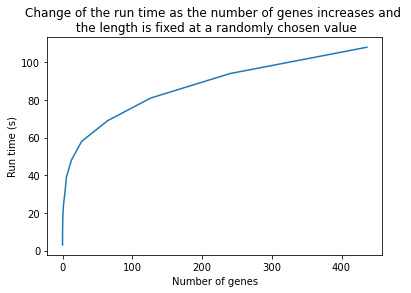

In [12]:
import random
import time
import matplotlib.pyplot as plt
#tests for the greedy approach 

#generate increasing length of the string 
def increase_length_local():
    """
    input
    None
    
    output
    local_time: list of floats 
    len_set: list of integers
    
    function runs the test 15 times increasing the number of genes each time. the length of each gene is fixed at a randomly generated value 
    """
    letters = 'AGCT'
    local_time = []
    str_set1 = []
    len_set = []
    
    M = random.randint(5,10) #fixed length of a gene
    N = random.randint(3,5) #starting number of genes
    
    
    for i in range(15): #number of tests 
        N = N+i
        len_set.append(N)
        
        for j in range(N):
            str_set1.append(('n', ''.join([random.choice(letters) for i in range(M)])))
        
        #start time
        st = time.process_time()

        # main program
        greedy_approach(str_set1,0)

        #end time
        et = time.process_time()

        local_time.append(et-st)

      
    return local_time, len_set 


lst = increase_length_local()

def build_graph(lst):
    plt.plot(lst[0], lst[1])
    plt.title('Change of the run time as the number of genes increases and \n the length is fixed at a randomly chosen value')
    plt.xlabel('Number of genes')
    plt.ylabel('Run time (s)')
    plt.show()
    
    
    return plt.show()

build_graph(lst)
